# Explore data
Want to explore data from 2019 - 2024 in the FA_may_aug with 50% catch to see what data is useful for predicting fish

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob
import os
import re

In [2]:
df = pd.read_csv('/home/peder/git/fish-forecast/Data-Exploration/catch_may_aug_2019_2024.csv', sep=';')
# Show unique dates in df
catch_dates = set(df['Date'])
print("Unique dates in df:", len(catch_dates))

# Print count of unique dates in copcus raw directory
copcus_path = '/home/peder/git/fish-forecast/Data/fa_mac_may_aug_50p_catch/copcus/raw'
copcus_files = glob.glob(os.path.join(copcus_path, '*.nc'))
copcus_dates = set([re.search(r'\d{4}-\d{2}-\d{2}', f).group() for f in copcus_files if re.search(r'\d{4}-\d{2}-\d{2}', f)])
print("Number of unique dates in copcus:", len(copcus_dates))

# Print count of unique dates in nk800 raw directory
nk800_path = '/home/peder/git/fish-forecast/Data/fa_mac_may_aug_50p_catch/nk800/raw'
nk800_files = glob.glob(os.path.join(nk800_path, '*.nc'))
nk800_dates = set([re.search(r'\d{4}-\d{2}-\d{2}', f).group() for f in nk800_files if re.search(r'\d{4}-\d{2}-\d{2}', f)])
print("Number of unique dates in nk800:", len(nk800_dates))
print("Dates in copcus but not in nk800:", copcus_dates - nk800_dates)
print("Dates in nk800 but not in copcus:", nk800_dates - copcus_dates)

no_catch_dates = nk800_dates - catch_dates
print(f"dates with no catch: {len(no_catch_dates)}")

Unique dates in df: 146
Number of unique dates in copcus: 292
Number of unique dates in nk800: 292
Dates in copcus but not in nk800: set()
Dates in nk800 but not in copcus: set()
dates with no catch: 146


we have now verified that copcus dates == nk800 dates and they are each 2x df dates, just as expected.

Now we want to see the distribution of catch and no catch dates in each year within our period 

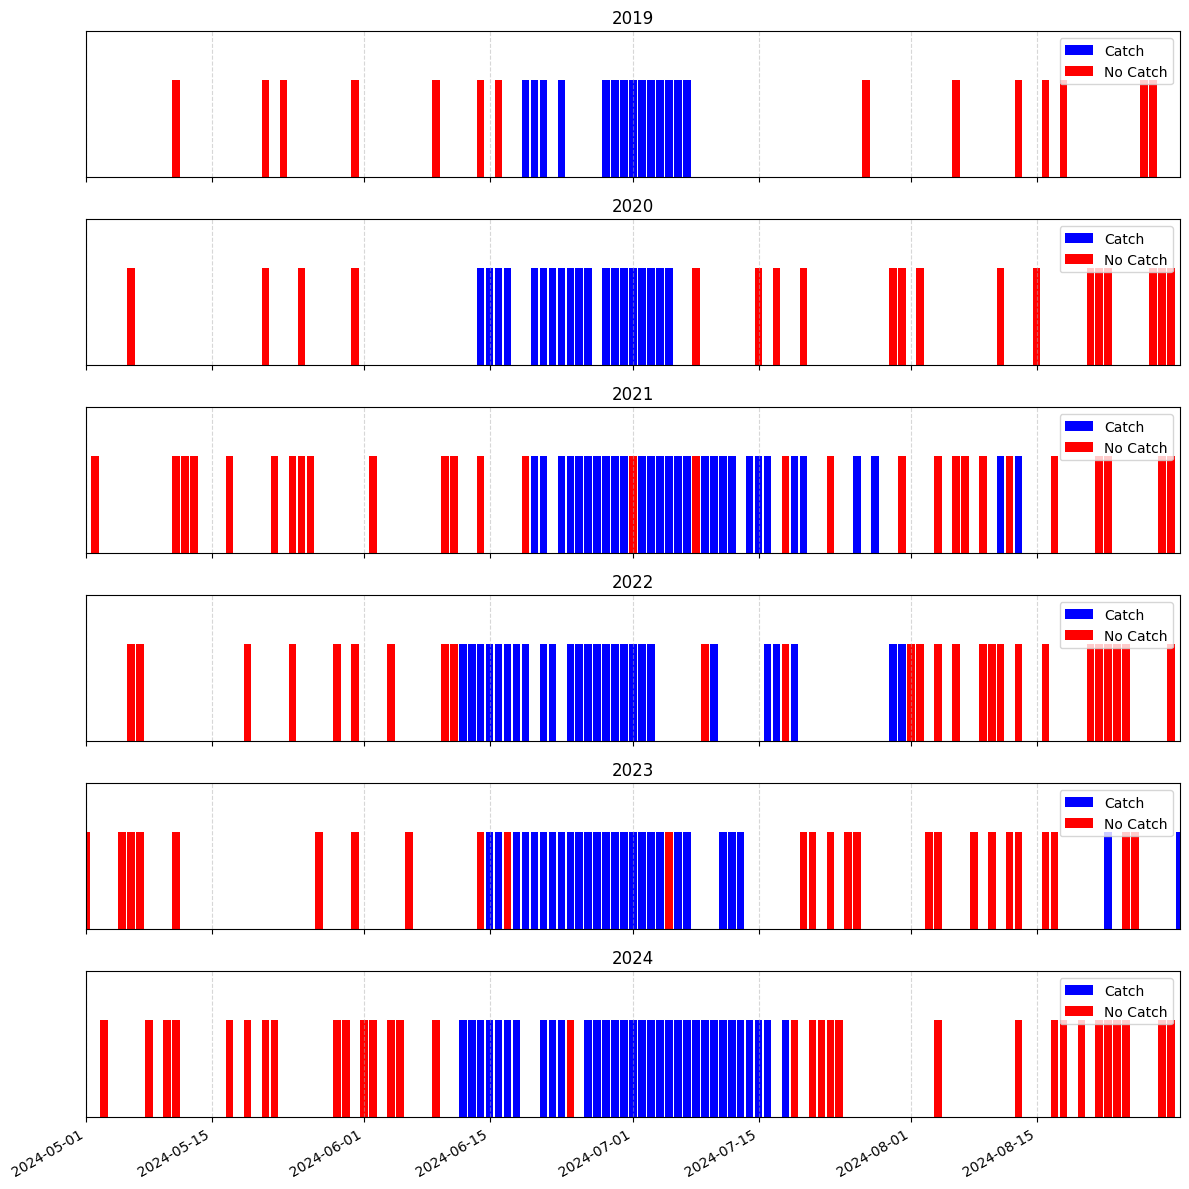

In [3]:
# TODO: create a list of dates between 05-01 and 08-31 for the years 2019-2024

# TODO: make a subplot for each of the 5 years, each subplot should span the dates from 05-01 to 08-31 make a blue bar for dates appearing in "catch_dates" and a red bar for dates appearing in "no_catch_dates"

def plot_date_distribution(catch_dates: set, no_catch_dates: set) -> None:
    # Pre-parse your date strings once
    catch_dt    = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in catch_dates]
    no_catch_dt = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in no_catch_dates]
    min_year = min([d.year for d in catch_dt])
    max_year = max([d.year for d in catch_dt])
    years = list(range(min_year, max_year + 1))  # 2019–2024 inclusive

    # Create a blank figure
    fig = plt.figure(figsize=(12, 2 * len(years)))

    for idx, year in enumerate(years):
        # Create the idx+1’th subplot in a len(years)×1 grid
        ax = fig.add_subplot(len(years), 1, idx + 1)

        # Define season start/end as datetimes
        start = datetime.datetime(year, 5, 1)
        end   = datetime.datetime(year, 8, 31)

        # Filter for this year’s season
        yc = [d for d in catch_dt    if start <= d <= end]
        yn = [d for d in no_catch_dt if start <= d <= end]

        # Plot blue bars for catches, red for no-catches
        w = 0.85
        ax.bar(yc, [1] * len(yc), color='blue',  width=w)
        ax.bar(yn, [1] * len(yn), color='red',   width=w)

        # Limit x to the season, hide y-axis
        ax.set_xlim(start, end)
        ax.set_ylim(0, 1.5)
        ax.get_yaxis().set_visible(False)

        # Title each subplot by year
        ax.set_title(str(year))

        # Only the top subplot needs a legend
        # if idx == 0:
        ax.legend(['Catch', 'No Catch'], loc='upper right')

        ax.grid(axis='x', linestyle='--', alpha=0.5)
    # Beautify the x-axis dates and layout
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

plot_date_distribution(catch_dates, no_catch_dates)

From the plot above see that the date distribution is all over the place, would it bee a better idea to have no catch dates closer to catch dates? I.e populate no catch days around the mean catch day in each year?


In [4]:
# TODO: find the first and last date in the catch_dates list in each year, make a set with dates in between, and subtract the catch_dates from this set


# Years you want subplots for
years = list(range(2019, 2025))  # 2019–2024 inclusive
catch_dt = [datetime.datetime.strptime(d, '%Y-%m-%d') for d in catch_dates]

for year in years:
    year_catch_dates = [d for d in catch_dt if d.year == year]
    first_catch_date = min(year_catch_dates)
    last_catch_date  = max(year_catch_dates)
    print(f"Year: {year}, start-end catch date: {str(first_catch_date)[:9]} - {str(last_catch_date)[:9]}")
    # Create a set of all dates between first and last catch date
    year_all_dates = set()
    for d in pd.date_range(start=first_catch_date, end=last_catch_date):
        year_all_dates.add(d)
    # Subtract the catch_dates from the all_dates set
    year_no_catch_dates = year_all_dates - set(year_catch_dates)
    print(f"      Total catches within period: {len(year_catch_dates)} no catch dates between start/stop: {len(year_no_catch_dates)}")
    print(f"      Dates to spare when filling middle:                                {len(year_catch_dates) - len(year_no_catch_dates)}")


Year: 2019, start-end catch date: 2019-06-1 - 2019-07-0
      Total catches within period: 14 no catch dates between start/stop: 5
      Dates to spare when filling middle:                                9
Year: 2020, start-end catch date: 2020-06-1 - 2020-07-0
      Total catches within period: 19 no catch dates between start/stop: 3
      Dates to spare when filling middle:                                16
Year: 2021, start-end catch date: 2021-06-2 - 2021-08-1
      Total catches within period: 29 no catch dates between start/stop: 26
      Dates to spare when filling middle:                                3
Year: 2022, start-end catch date: 2022-06-1 - 2022-07-3
      Total catches within period: 26 no catch dates between start/stop: 24
      Dates to spare when filling middle:                                2
Year: 2023, start-end catch date: 2023-06-1 - 2023-08-3
      Total catches within period: 26 no catch dates between start/stop: 52
      Dates to spare when filling middle:

Try to select dates by populating N/2 before and after median?

In [5]:
new_median_no_catch_dates = set()
new_avg_no_catch_dates = set()
new_middle_no_catch_dates = set()

for year in years:
    # filter and sort catch dates for the year
    year_catch_dt = sorted([d for d in catch_dt if d.year == year])
    N = len(year_catch_dt)
    # find the median catch date
    median = year_catch_dt[N // 2]
    # find the avg catch date
    mean_ts = pd.to_datetime(year_catch_dt).mean()
    avg = mean_ts.normalize().to_pydatetime()   # convert to datetime leaving the time part as 00:00:00
    # find middle catch date
    middle = (year_catch_dt[-1] - year_catch_dt[0]) / 2 + year_catch_dt[0]
    middle = pd.to_datetime(middle).normalize().to_pydatetime()

    print(f"Year: {year}, median catch date: {median}")
    print(f"Year: {year}, average catch date: {avg}")
    print(f"Year: {year}, middle catch date: {middle}")
    print(f"Year: {year}, catches (N) = {N}")


    # build the full season set
    start = datetime.datetime(year, 5, 1)
    end   = datetime.datetime(year, 8, 31)
    season_dates = set(pd.date_range(start, end).to_pydatetime().tolist())

    # get non-catch dates and sort
    non_catch = sorted(season_dates - set(year_catch_dt))

    # split N into two halves, giving the extra day to 'after' if N is odd
    half = N // 2
    before_count = half
    after_count = half + (N % 2)

    # pick the dates immediately before and after the median
    median_before = [d for d in non_catch if d < median][-before_count:]
    median_after  = [d for d in non_catch if d > median][:after_count]

    avg_before = [d for d in non_catch if d < avg][-before_count:]
    avg_after  = [d for d in non_catch if d >= avg][:after_count]

    middle_before = [d for d in non_catch if d < middle][-before_count:]
    middle_after  = [d for d in non_catch if d >= middle][:after_count]


    # count how many we're adding this year
    added = len(median_before) + len(median_after)
    print(f"Year: {year}, adding {added} to all sets\n")

    # add to your global median set
    for d in median_before + median_after:
        new_median_no_catch_dates.add(d.strftime('%Y-%m-%d'))

    # add to your global avg set
    for d in avg_before + avg_after:
        new_avg_no_catch_dates.add(d.strftime('%Y-%m-%d'))

    # add to your global avg set
    for d in middle_before + middle_after:
        new_middle_no_catch_dates.add(d.strftime('%Y-%m-%d'))

Year: 2019, median catch date: 2019-07-01 00:00:00
Year: 2019, average catch date: 2019-06-29 00:00:00
Year: 2019, middle catch date: 2019-06-28 00:00:00
Year: 2019, catches (N) = 14
Year: 2019, adding 14 to all sets

Year: 2020, median catch date: 2020-06-25 00:00:00
Year: 2020, average catch date: 2020-06-25 00:00:00
Year: 2020, middle catch date: 2020-06-24 00:00:00
Year: 2020, catches (N) = 19
Year: 2020, adding 19 to all sets

Year: 2021, median catch date: 2021-07-06 00:00:00
Year: 2021, average catch date: 2021-07-08 00:00:00
Year: 2021, middle catch date: 2021-07-17 00:00:00
Year: 2021, catches (N) = 29
Year: 2021, adding 29 to all sets

Year: 2022, median catch date: 2022-06-27 00:00:00
Year: 2022, average catch date: 2022-06-29 00:00:00
Year: 2022, middle catch date: 2022-07-06 00:00:00
Year: 2022, catches (N) = 26
Year: 2022, adding 26 to all sets

Year: 2023, median catch date: 2023-06-29 00:00:00
Year: 2023, average catch date: 2023-07-02 00:00:00
Year: 2023, middle catch 

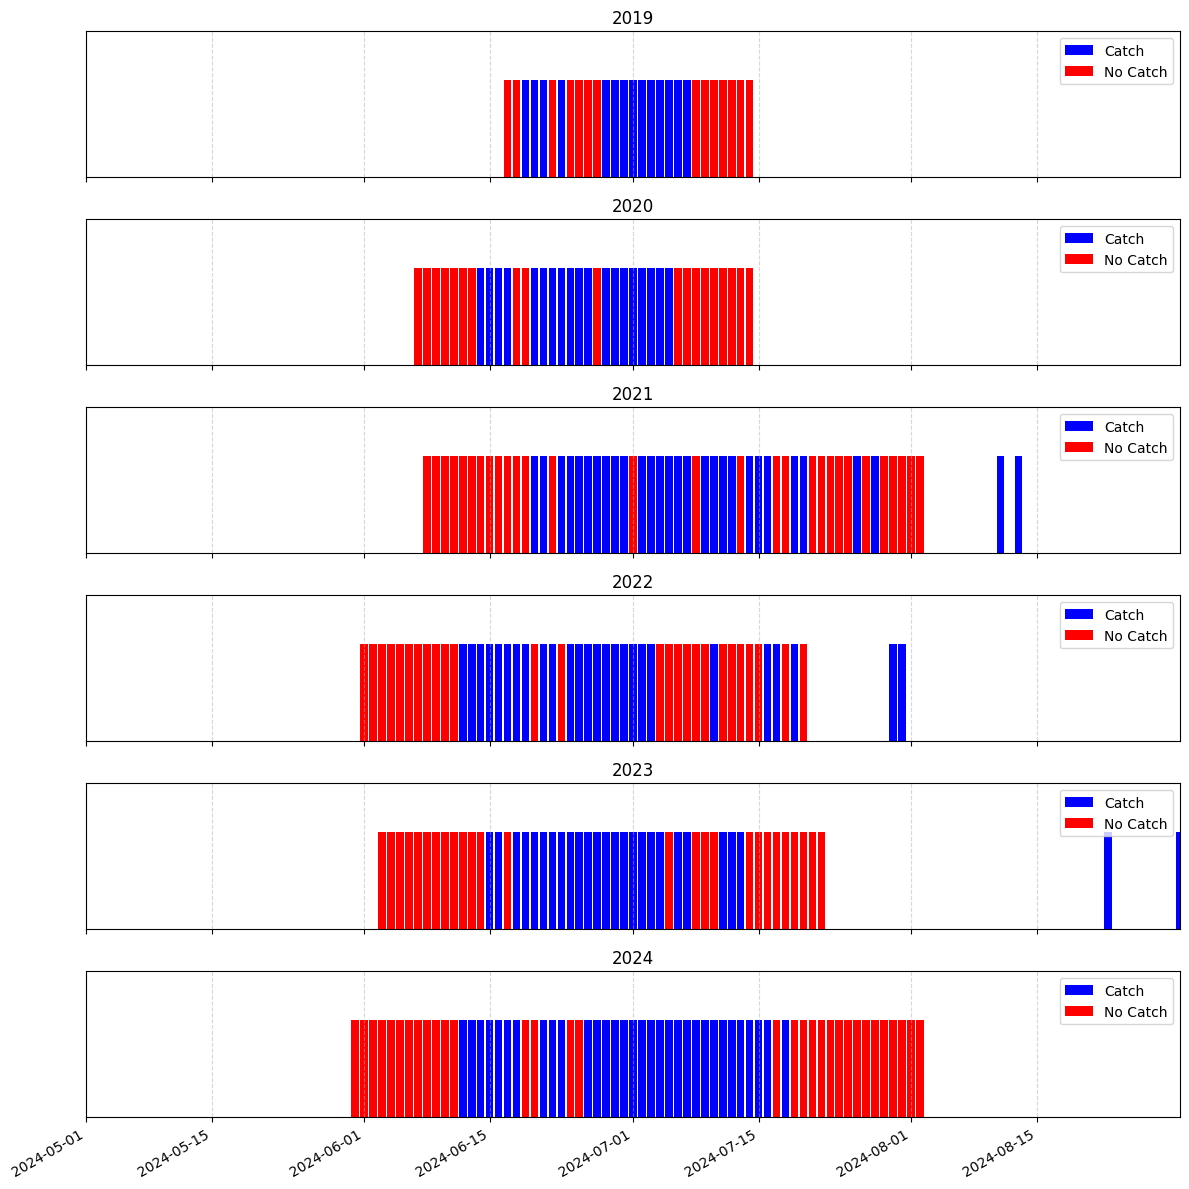

In [6]:
plot_date_distribution(catch_dates, new_median_no_catch_dates)

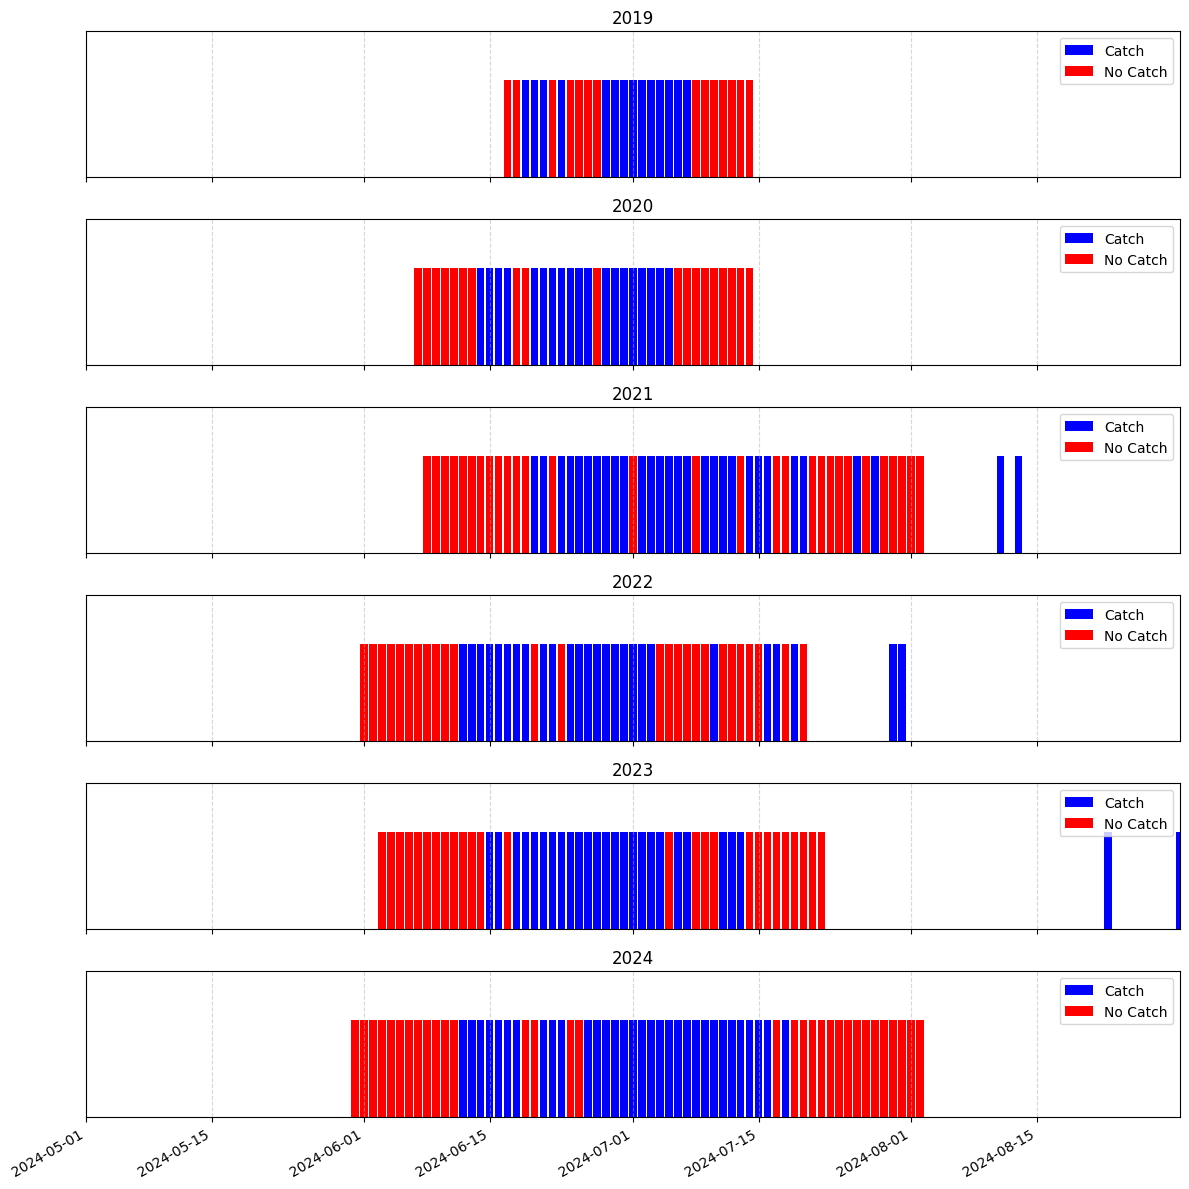

In [7]:
plot_date_distribution(catch_dates, new_avg_no_catch_dates)

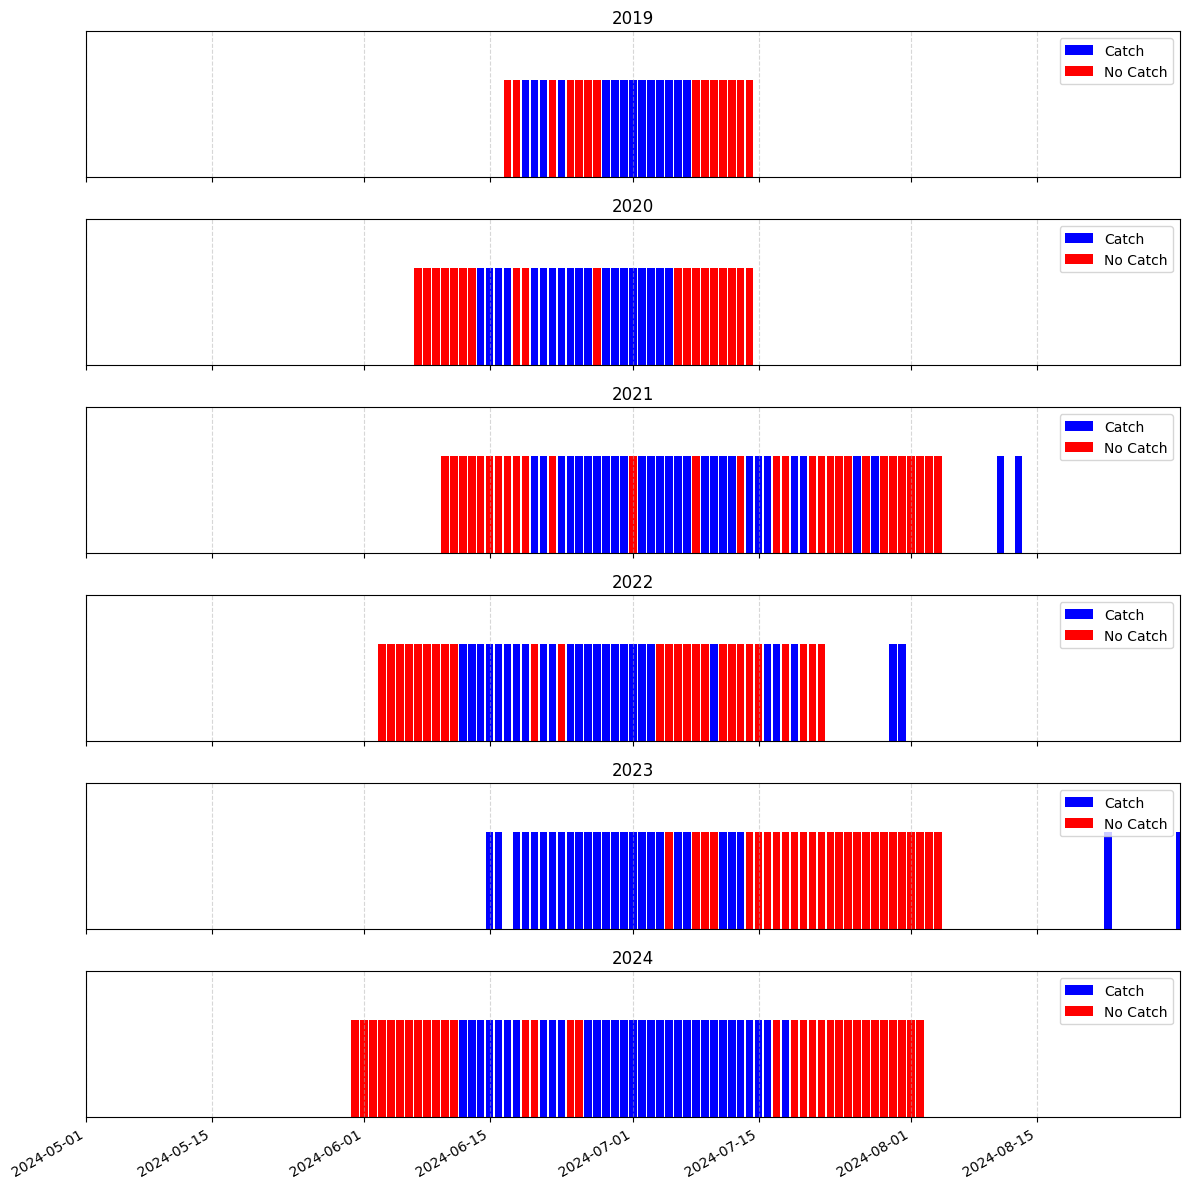

In [8]:
plot_date_distribution(catch_dates, new_middle_no_catch_dates)

Still we could benefit from not having the outliers?

bug in avg.

Should we make more advanced population to fill?


Year: 2019, midpoint = 2019-06-28 00:00:00, N = 14
Year: 2020, midpoint = 2020-06-24 00:00:00, N = 19
Year: 2021, midpoint = 2021-07-17 00:00:00, N = 29
Year: 2022, midpoint = 2022-07-06 00:00:00, N = 26
Year: 2023, midpoint = 2023-07-23 00:00:00, N = 26
Year: 2024, midpoint = 2024-06-30 00:00:00, N = 32


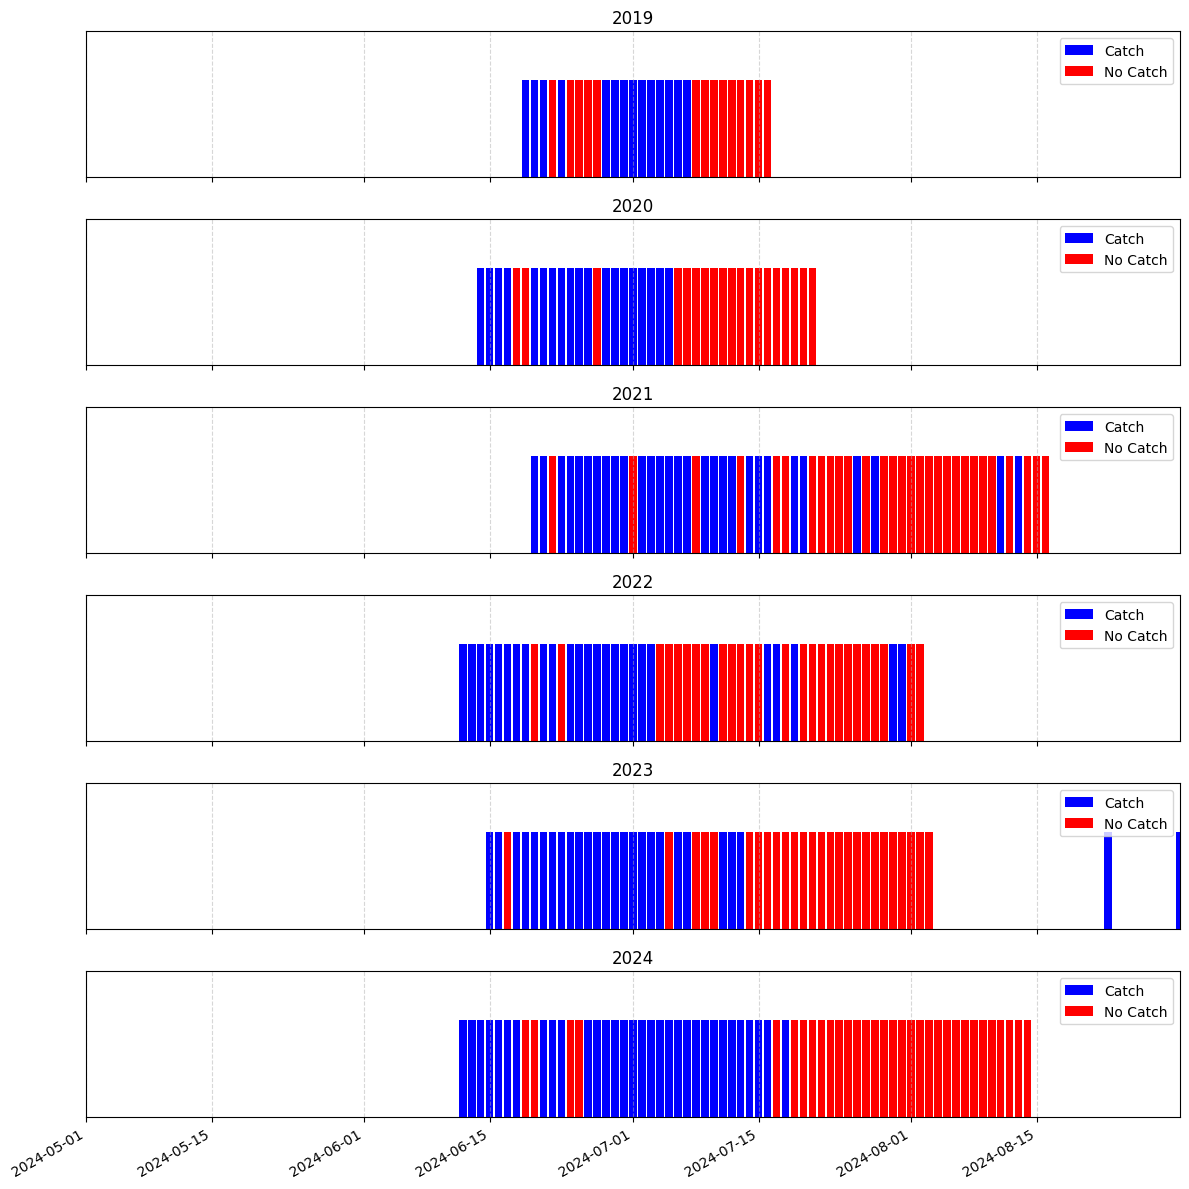

In [9]:
new_full_no_catch_dates = set()

for year in years:
    # 1) filter+sort this year’s catches
    year_catch_dt = sorted(d for d in catch_dt if d.year == year)
    N = len(year_catch_dt)

    # 2) compute midpoint for possible padding heuristic
    free_span = year_catch_dt[-1] - year_catch_dt[0]
    middle    = (year_catch_dt[0] + free_span / 2)
    middle    = pd.to_datetime(middle).normalize().to_pydatetime()

    print(f"Year: {year}, midpoint = {middle}, N = {N}")

    # 3) full May–Aug season and strip out actual catch days
    start = datetime.datetime(year, 5, 1)
    end   = datetime.datetime(year, 8, 31)
    season_dates = set(pd.date_range(start, end).to_pydatetime())
    season_no_catch = sorted(season_dates - set(year_catch_dt))

    # 4) **FIRST**: pick up to N dates *after* the very first catch
    after_first = [d for d in season_no_catch if d > year_catch_dt[0]]
    pick_after  = after_first[:N]
    new_full_no_catch_dates.update(pick_after)

    # 5) **THEN**: if we haven’t got N yet, pad from the *rest* of the season_no_catch
    if len(pick_after) < N:
        need = N - len(pick_after)

        # build the pool of “remaining” dates
        remaining_pool = [d for d in season_no_catch if d not in pick_after]

        # TODO: choose your padding strategy here. E.g.:
        #   A) closest to the midpoint:
        remaining_pool.sort(key=lambda d: abs((d - middle).days))

        #   B) or just the earliest in the season:
        # remaining_pool = sorted(remaining_pool)

        pad = remaining_pool[:need]
        new_full_no_catch_dates.update(pad)

# then convert or plot as before
# plot_date_distribution expects strings, so:
no_catch_strs = {d.strftime('%Y-%m-%d') for d in new_full_no_catch_dates}
plot_date_distribution(catch_dates, no_catch_strs)


## Thoughts
All sets w/o 2023 is continuous. I want to create a new dataset by copying all dates i already have and downloading the new dates then inspect the data with classification catch no catch 

Create fa_mac_may_aug_50p_catch_continous



In [10]:
all_dates = catch_dates.union(no_catch_strs)
# len(all_dates)

# # TODO: copy dates appearing in both folders [/home/peder/git/fish-forecast/Data/fa_mac_may_aug_50p_catch/copcus/raw], [/home/peder/git/fish-forecast/Data/fa_mac_may_aug_50p_catch/nk800/raw] and all_dates into the folder [/home/peder/git/fish-forecast/Data/fa_mac_may_aug_50p_catch_continuous/], make the folder if it does not exist

# from pathlib import Path
# import shutil

# # define roots
# root = Path('/home/peder/git/fish-forecast/Data/fa_mac_may_aug_50p_catch')
# src_dirs = {
#     'copcus': root / 'copcus' / 'raw',
#     'nk800' : root / 'nk800'  / 'raw',
# }
# dst_root = root / 'fa_mac_may_aug_50p_catch_continuous'

# # make sure continuous subdirs exist
# for source_name in src_dirs:
#     (dst_root / source_name / 'raw').mkdir(parents=True, exist_ok=True)

# # copy matching files
# for source_name, src_dir in src_dirs.items():
#     dst_dir = dst_root / source_name / 'raw'
#     for f in src_dir.iterdir():
#         if not f.is_file():
#             continue
#         if f.stem in all_dates:
#             shutil.copy2(f, dst_dir / f.name)

# # report
# for source_name in src_dirs:
#     n = len(list((dst_root / source_name / 'raw').iterdir()))
#     print(f"→ {n} files copied into {dst_root/source_name/'raw'}")


Great, now we need to download the remaining 112 days to compleate this dataset...

In [11]:
# Get the set of dates from files in continuous folder
continuous_path = '/home/peder/git/fish-forecast/Data/fa_mac_may_aug_50p_catch_continuous/copcus/raw'
continuous_files = glob.glob(os.path.join(continuous_path, '*.nc'))
continuous_dates = set([re.search(r'\d{4}-\d{2}-\d{2}', f).group() for f in continuous_files if re.search(r'\d{4}-\d{2}-\d{2}', f)])
# print(sorted(continuous_dates))

# Find dates that need to be downloaded (in all_dates but not in continuous_dates)
dates_to_download = sorted(all_dates - continuous_dates)
print(f"Dates to download: {len(dates_to_download)}")
print("Dates:", dates_to_download)

Dates to download: 112
Dates: ['2019-06-22', '2019-06-24', '2019-06-25', '2019-06-26', '2019-06-27', '2019-07-08', '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16', '2020-06-18', '2020-06-19', '2020-06-27', '2020-07-06', '2020-07-07', '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-16', '2020-07-18', '2020-07-19', '2020-07-21', '2021-06-22', '2021-07-13', '2021-07-17', '2021-07-21', '2021-07-22', '2021-07-24', '2021-07-25', '2021-07-27', '2021-07-29', '2021-07-30', '2021-08-01', '2021-08-02', '2021-08-03', '2021-08-05', '2021-08-08', '2021-08-10', '2021-08-14', '2021-08-15', '2021-08-16', '2022-06-20', '2022-06-23', '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15', '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23', '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27', '2022-07-28', '20

In [19]:
import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

from logger import logger
from fetch_data import *
from plot_data import *
from utilities import *



# Load or create the regions dictionary.
region_name = "FA_Makrell_MayAug_summer"
region_coords = get_region_border("/home/peder/git/fish-forecast/areas.json", region_name, square=False)

test_params_nor800 = {
    "variables": ['temperature', 'salinity', 'h', 'u', 'v', 'w'],
    "time": dates_to_download,      # Only the specific catch dates
    "depth": slice(0, 50)   # depht range to include
    }
    # logger.info(f"Fetching data for dates: {dates}")
    # exit()

# Define the parameters in a dictionary.
params = {
    "region_name": region_name,
    "region_coords": region_coords,
    "time_range": ["2021-01-01", "2021-01-01"],
    "fetch_variables": ["chl", "no3", "o2", "phyc", "zooc"],
    "plot_variable": "thetao"  # This could be used later for plotting purposes.
}

test_params_nor800.update(region_coords)

dates_to_download = ['2022-07-25']

folder = f"/home/peder/git/fish-forecast/Data/"
for d in dates_to_download:
    # Skip if date exists in both directories
    copcus_exists = os.path.exists(os.path.join(folder, "copcus", f"{str(d)[:10]}.nc"))
    nk800_exists = os.path.exists(os.path.join(folder, "nk800", f"{str(d)[:10]}.nc"))
    
    if copcus_exists and nk800_exists:
        logger.warning(f"Skipping {d} - already exists in both directories")
        continue
    logger.info(f"Downloading {d}")
        
    os.makedirs(os.path.join(folder, "copcus"), exist_ok=True)
    os.makedirs(os.path.join(folder, "nk800"), exist_ok=True)

    # depths = [0, 1, 2]
    test_params_nor800["time"] = [d]
    params["time_range"] = [d, d]
    # for i in depths:
    #     # Fetch and plot data from Norkyst800 for the specific date.
    #     # test_params_nor800["depth"] = slice(i, i + 1)
    #     ds_norkyst = get_norkyst800_data(test_params_nor800)
        
    #     temp_path = f"{base_folder}_norkyst800/temp/{depths[i]}"
    #     sal_path = f"{base_folder}_norkyst800/sal/{depths[i]}"
    #     os.makedirs(temp_path, exist_ok=True)
    #     os.makedirs(sal_path, exist_ok=True)
    #     plot_norkyst800_temperature(ds_norkyst, temp_path, region_coords, depth=i)
    #     plot_norkyst800_salinity(ds_norkyst, sal_path, region_coords, depth=i)

    
    # ds_norkyst = get_norkyst800_data(test_params_nor800)
    # # plot_norkyst800_temperature(ds_norkyst, "test_NK800", bigger_region_coords, depth=0)
    # # exit()
    
    # ds_norkyst.to_netcdf(f"{folder}/nk800/{str(d)[:10]}.nc")
    # Fetch and plot data from Copernicus for the specific date.
    dataset = fetch_or_load_data(params)
    dataset.to_netcdf(f"{folder}/copcus/{str(d)[:10]}.nc")
    # logger.warning(f"Done with date: {d}, dates remaining: {len(dates_to_download) - dates_to_download.tolist().index(d) - 1}")
    # copcus_folder = f"{base_folder}_copernicus"
    # os.makedirs(copcus_folder, exist_ok=True)
    # plot_copernicus_variable(dataset, ["chl", "no3", "o2", "phyc", "zooc"],out_folder=copcus_folder, region_coords=region_coords)

# logger.info(ds_norkyst)


# TODO: stack more input to see what restrictions on images into GAN
# TODO: optimize the data fetching and plotting (getting data from norkyst800 does not work for bigger ranges) 

18:12:42.534 | INFO     | /tmp/ipykernel_465376/2376786275.py:46 - Downloading 2022-07-25
INFO - 2025-05-10T16:12:43Z - Selected dataset version: "202105"
INFO - 2025-05-10T16:12:43Z - Selected dataset part: "default"
